The paper to be processed: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9504555

Table 4.

citations:
fan 65
liskowski 66
khalaf 67
tan 69
guo 70
ulysal 71

In [1]:
import sympy as sp

In [2]:
x = sp.Symbol('x', nonnegative=True)
alpha = sp.Symbol('alpha', nonnegative=True)
beta = sp.Symbol('beta', nonnegative=True)
th = sp.Symbol('th', nonnegative=True)

In [3]:
sp.integrate((1 - x**beta)*sp.diff((1 - x)**alpha, x), (x, 0, 1))

KeyboardInterrupt: 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from mlscorecheck.auc import auc_from_aggregated, max_acc_from_aggregated, estimate_acc_interval, auc_from, auc_min, auc_max
from mlscorecheck.auc import auc_onmin_grad, auc_maxa_grad, auc_max_grad, auc_rmin_grad, auc_max, auc_lower_from, auc_upper_from, auc_analytic, auc_analytic_exponents, exponential_fitting, exponential_fitting2
from mlscorecheck.auc import generate_roc_curve, integrate_roc_curve, generate_roc_curve_slope, generate_1_roc_curve, integrate_roc_curves, sample_triangle
from mlscorecheck.experiments import load_drive

In [17]:
fprs, tprs = [], []
for _ in range(1000):
    fp, tp = generate_1_roc_curve(0.7763, 1.0 - 0.9767, 1000, random_middle=False)
    fprs.append(fp)
    tprs.append(tp)                
fprs = np.vstack(fprs)
tprs = np.vstack(tprs)

In [18]:
aucs = integrate_roc_curves(fprs, tprs)

In [19]:
np.mean(aucs)

np.float64(0.925546996137226)

(array([ 85., 129., 119., 133., 138., 106., 111.,  65.,  75.,  39.]),
 array([0.87673347, 0.88781352, 0.89889356, 0.90997361, 0.92105366,
        0.9321337 , 0.94321375, 0.9542938 , 0.96537384, 0.97645389,
        0.98753394]),
 <BarContainer object of 10 artists>)

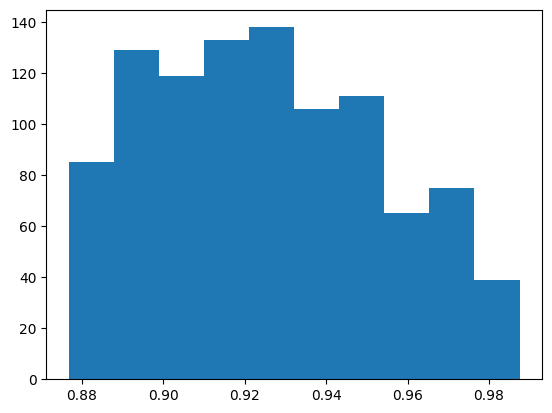

In [20]:
plt.hist(aucs)

In [8]:
(auc_min(1.0 - 0.976, 0.7763) + auc_max(1.0 - 0.976, 0.7763))/2

0.87615

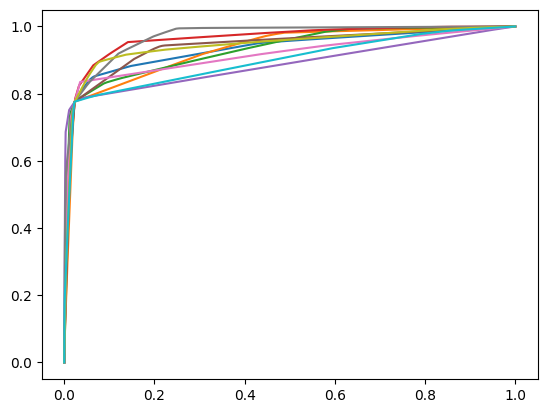

In [22]:
for idx in range(10, 20):
    plt.plot(fprs[idx], tprs[idx])

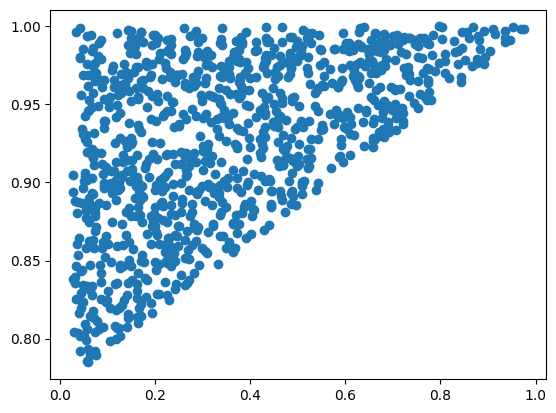

In [45]:
plt.scatter(fprs[:, 3], tprs[:, 3])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
[0.         0.70604274 0.75287448 0.77258868 0.7763     0.78357603
 0.78644799 0.78744783 0.78804257 0.78826588 0.79658868 0.79784933
 0.79813763 0.79953345 0.80147612 0.80857698 0.81239725 0.82194034
 0.84334324 1.        ] [0.         0.01417873 0.01517306 0.02206642 0.024      0.02873858
 0.03060901 0.03126021 0.0316479  0.03179354 0.03722977 0.03806165
 0.03826535 0.03967356 0.04370281 0.05870015 0.06736218 0.10153672
 0.20417802 1.        ]


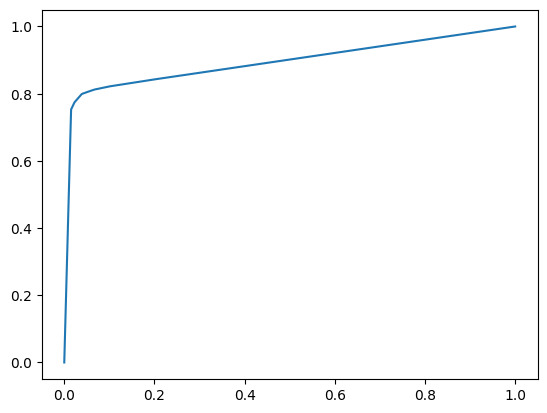

In [61]:
#random_state = np.random.RandomState(5)
fpr, tpr = generate_1_roc_curve(0.7763, 1.0 - 0.976, 20, random_middle=True
plt.plot(fpr, tpr)
print(tpr, fpr)

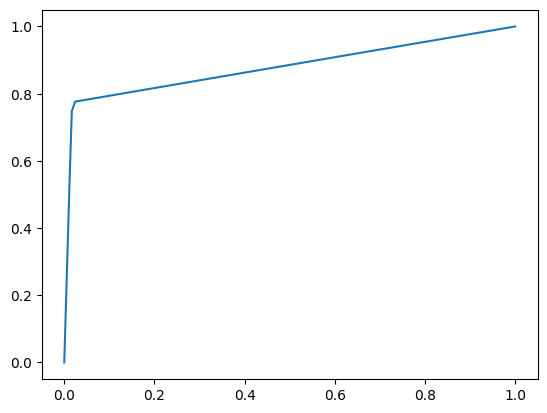

In [18]:
plt.plot(fpr, tpr)

In [5]:
curves = generate_roc_curve_slope(0.7763, 1.0 - 0.976, 100, 1000)
mask = np.all(curves[0] <= curves[1], axis=1)
curves = (curves[0][mask], curves[1][mask])
aucs = [integrate_roc_curve(fprs, tprs) for fprs, tprs in zip(*curves)]

(array([159., 153., 132., 111., 122., 102.,  96.,  64.,  41.,  20.]),
 array([0.87704229, 0.88760498, 0.89816768, 0.90873037, 0.91929306,
        0.92985576, 0.94041845, 0.95098114, 0.96154383, 0.97210653,
        0.98266922]),
 <BarContainer object of 10 artists>)

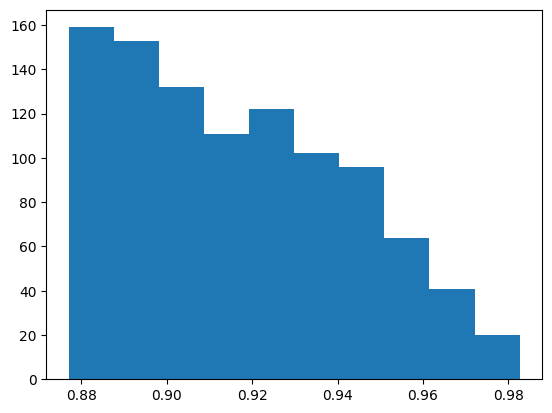

In [6]:
plt.hist(aucs)

In [18]:
curves

(array([[0.00000000e+00, 1.16950049e-02, 1.73783040e-02, 1.92942283e-02,
         1.95897351e-02, 1.98106097e-02, 1.98658816e-02, 1.99543963e-02,
         2.00770622e-02, 2.05526862e-02, 2.18402767e-02, 2.28608488e-02,
         2.34726813e-02, 2.36871079e-02, 2.37742703e-02, 2.40000000e-02,
         7.64306482e-02, 9.28598565e-02, 1.52692127e-01, 2.99058420e-01,
         5.63688953e-01, 6.23427045e-01, 7.18069220e-01, 7.18335363e-01,
         7.18742308e-01, 7.27554341e-01, 7.49259061e-01, 7.99295492e-01,
         8.14908854e-01, 1.00000000e+00],
        [0.00000000e+00, 2.39414670e-04, 8.19294891e-03, 8.31951307e-03,
         8.62733259e-03, 8.86866852e-03, 9.77809513e-03, 1.20804452e-02,
         1.99759564e-02, 2.00591513e-02, 2.10598590e-02, 2.20355928e-02,
         2.27953551e-02, 2.31942318e-02, 2.36985499e-02, 2.40000000e-02,
         3.56829114e-02, 5.22327061e-02, 6.31696979e-02, 2.07184126e-01,
         2.08500447e-01, 2.09390312e-01, 2.12065228e-01, 2.18723843e-01,
         

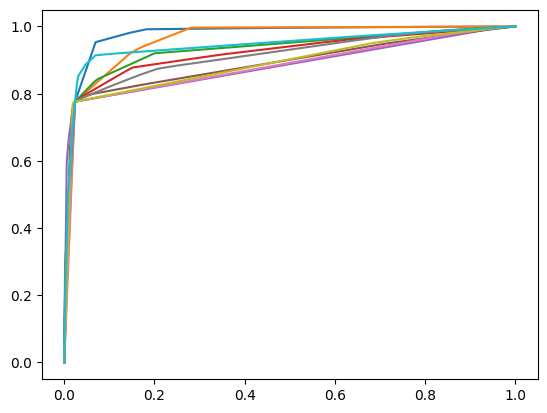

In [7]:
for idx in range(10):
    plt.plot(curves[0][idx], curves[1][idx])

In [7]:
curves[0][0], curves[1][0]

(array([0.        , 0.02108548, 0.0230091 , 0.0232    , 0.77689749,
        1.        ]),
 array([0.        , 0.70554568, 0.76991234, 0.7763    , 0.9489066 ,
        1.        ]))

In [8]:
curves[0][1], curves[1][1]

(array([0.        , 0.02171395, 0.02258074, 0.0232    , 0.26695228,
        1.        ]),
 array([0.        , 0.72657491, 0.75557866, 0.7763    , 0.83212247,
        1.        ]))

In [ ]:
def auc_est(spec, sens, p, n):
    alpha = np.logspace(0, 2, 5000)
    beta = np.logspace(0, 2, 5000)
    
    tpr = sens
    fpr = 1 - spec
    
    x = 1 - (tpr * p + fpr * n)/(p + n)
    th = p/(p+n)

    tmp = np.abs(((1 - th**alpha))[:, None] + (1 - th)**beta - x*(1/alpha[:, None] + 1/beta))

    indices = np.where(tmp == tmp.min())

    tprs = 1 - np.linspace(0, 1, 2000)**beta[indices[1]]
    fprs = (1 - np.linspace(0, 1, 2000))**alpha[indices[0]]
    return np.sum((tprs[1:] + tprs[:-1])/2 * (fprs[:-1] - fprs[1:]))

In [169]:
alpha = np.logspace(0, 2, 5000)
beta = np.logspace(0, 2, 5000)
x = 0.08
tpr = 0.776
fpr = 1 - 0.976
p = 30_000
n = 200_000
x = 1 - (tpr * p + fpr * n)/(p + n)
th = p/(p+n)

In [170]:
tmp = np.abs(((1 - th**alpha))[:, None] + (1 - th)**beta - x*(1/alpha[:, None] + 1/beta))

In [171]:
tmp.shape

(5000, 5000)

In [172]:
tmp.min()

np.float64(3.7315402545701204e-07)

In [173]:
indices = np.where(tmp == tmp.min())

In [174]:
alpha[indices[0]], beta[indices[1]]

(array([1.01298058]), array([25.57888305]))

In [175]:
tprs = 1 - np.linspace(0, 1, 2000)**beta[indices[1]]
fprs = (1 - np.linspace(0, 1, 2000))**alpha[indices[0]]
np.sum((tprs[1:] + tprs[:-1])/2 * (fprs[:-1] - fprs[1:]))

np.float64(0.9637524346519192)

In [150]:
np.max([alpha[indices[0]], beta[indices[1]]]) / (alpha[indices[0]] + beta[indices[1]])

array([0.98554199])

In [16]:
fprs = np.array([0, 1 - 0.9768, 1])
tprs = np.array([0, 0.7763, 1])
fracs = (tprs * 30000 + fprs * 200000)/230000
row = {
    'fprs': fprs,
    'tprs': tprs,
    'fracs': fracs
}

In [27]:
exp_sens = np.log(1 - row['tprs'][1])/np.log(row['fracs'][1])
exp_spec = np.log(row['fprs'][1])/np.log(1 - row['fracs'][1])

In [28]:
exp_sens, exp_spec

(np.float64(0.7102256007741253), np.float64(29.071508814224735))

In [29]:
exp_spec / (exp_spec + exp_sens)

np.float64(0.9761523089663832)

In [3]:
exponential_fitting2(row, 'fprs', 'fracs'), exponential_fitting2(row, 'tprs', 'fracs')

((1.0, 1.0, -3), (1.0, 1.0, -1))

In [5]:
4.10/4.20

0.976190476190476

In [8]:
1.62/(1.62 + 0.066)

0.9608540925266904

In [4]:
1.8728/(1.8728 + 0.08878)

0.9547405662782043

In [4]:
exponential_fitting(row, 'fprs', 'fracs')

1.0 1.785040070971583 0
1.0 0.18131717962658297 1


(1.0, np.float64(0.18131717962658297), 1)

In [5]:
1.78/(1.78 + 1/11)

0.9514091350826045

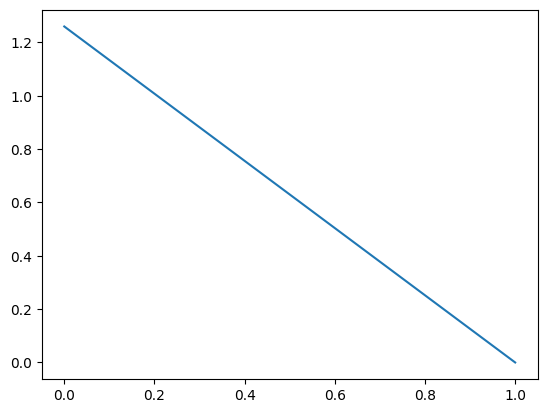

In [13]:
x = np.linspace(0, 1, 1000)
exp = 3
plt.plot(x, (np.abs(1 - x)**exp + np.abs(1 - x)**exp)**(1/exp))

In [7]:
1/0.1813 / (1/0.1813 + 1/12)

0.9851165310763219

In [6]:
1.78/(1.78 + 0.12)

0.9368421052631579

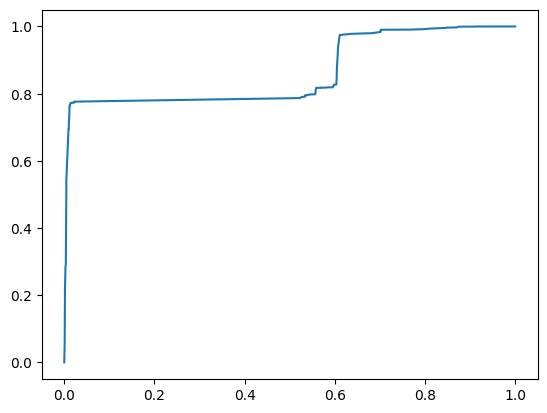

In [11]:
aucs = [integrate_roc_curve(fprs, tprs) for fprs, tprs in zip(curves[0], curves[1])]

(array([ 5.,  8., 10.,  4.,  9., 11.,  8.,  7.,  6.,  3.]),
 array([0.82094001, 0.83718162, 0.85342324, 0.86966485, 0.88590647,
        0.90214808, 0.9183897 , 0.93463131, 0.95087293, 0.96711454,
        0.98335616]),
 <BarContainer object of 10 artists>)

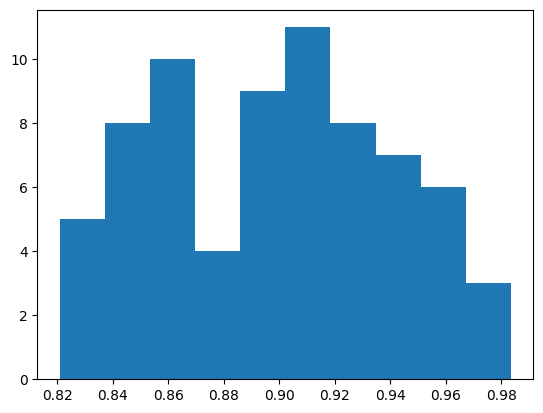

In [12]:
plt.hist(aucs)

In [2]:
data = {
'fan': {
    'sens': 0.7814,
    'spec': 0.9788,
    'acc': 0.9612,
    'cite': 65
},
'liskowski': {
    'sens': 0.7763,
    'spec': 0.9768,
    'acc': 0.9495,
    'auc': 0.972,
    'cite': 66
},
'khalaf': {
    'sens': 0.8397,
    'spec': 0.9562,
    'acc': 0.9456,
    'cite': 67
},
'tan': {
    'sens': 0.7537,
    'spec': 0.9694,
    'cite': 69
},
'guo': {
    'acc': 0.9199,
    'auc': 0.9652,
    'cite': 70
},
'uysal': {
    'sens': 0.7548,
    'spec': 0.9682,
    'acc': 0.9419,
    'cite': 71
}
}

In [7]:
auc_analytic({'sens': 0.7252, 'spec': 0.9798} | {'p': 30000, 'n': 300000})

0.0842909090909091
0.12990104486713247 1.5775630638744096


0.923921654222721

In [24]:
def one_exponent(sens, spec):
    x = np.logspace(-2, 0, 5000)
    idx = np.argmin(((2**x - (1 - spec))/((1 - spec)))**2 + ((2**(1/x) - sens)/(sens))**2)

    return x[idx]
    

In [25]:
one_exponent(0.7763, 0.9768)

np.float64(0.2815074533594139)

In [26]:
(1/0.2815)/((1/0.2815) + 0.2815)

0.9265760305436523

In [13]:
np.log10(1 - 0.9768)/(np.log10(1 - 0.9768) + np.log10(0.7763))

np.float64(0.9369610080262911)

In [10]:
exp_fpr, exp_tpr

(np.float64(1.5775630638744096), np.float64(0.12990104486713247))

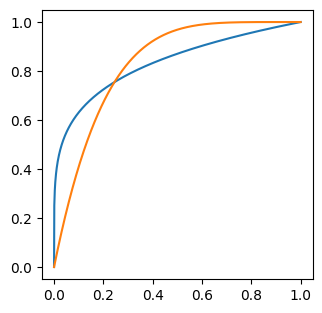

In [73]:
plt.figure(figsize=(3.5, 3.5))
x = np.linspace(0, 1, 1001)
#plt.plot(x**5, x**0.2)
#plt.plot(x, x**5)
plt.plot(x, x**0.2)

#plt.plot((1-(x)**0.2), 1 - x)
plt.plot(x, 1 - (1 - x)**5)

#plt.plot(x, ((x**0.2) + (1 - (1 - x)**5))/2)

In [6]:
auc_analytic({'sens': 0.7252, 'spec': 0.9798} | {'p': 200000, 'n': 30000})

0.6332434782608696


0.9239216542227211

In [3]:
data = pd.DataFrame(data).T

In [4]:
data

,sens,spec,acc,cite,auc
fan,0.7814,0.9788,0.9612,65.0,NaN
liskowski,0.7763,0.9768,0.9495,66.0,0.9720
khalaf,0.8397,0.9562,0.9456,67.0,NaN
tan,0.7537,0.9694,NaN,69.0,NaN
guo,NaN,NaN,0.9199,70.0,0.9652
uysal,0.7548,0.9682,0.9419,71.0,NaN


In [5]:
print(data.to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & sens & spec & acc & cite & auc \\
\midrule
fan & 0.781400 & 0.978800 & 0.961200 & 65.000000 & NaN \\
liskowski & 0.776300 & 0.976800 & 0.949500 & 66.000000 & 0.972000 \\
khalaf & 0.839700 & 0.956200 & 0.945600 & 67.000000 & NaN \\
tan & 0.753700 & 0.969400 & NaN & 69.000000 & NaN \\
guo & NaN & NaN & 0.919900 & 70.000000 & 0.965200 \\
uysal & 0.754800 & 0.968200 & 0.941900 & 71.000000 & NaN \\
\bottomrule
\end{tabular}



In [6]:
drive = load_drive()[(1, 'all')]['test']['images']

In [7]:
ns = np.array([dr['n'] for dr in drive])
ps = np.array([dr['p'] for dr in drive])
ps, ns

(array([29440, 33790, 32893, 30354, 30912, 32116, 30152, 28389, 26741,
        27156, 29539, 28490, 32259, 26677, 23614, 29791, 27852, 26144,
        27371, 24265]),
 array([300520, 296170, 297067, 299606, 299048, 297844, 299808, 301571,
        303219, 302804, 300421, 301470, 297701, 303283, 306346, 300169,
        302108, 303816, 302589, 305695]))

In [8]:
data

,sens,spec,acc,cite,auc
fan,0.7814,0.9788,0.9612,65.0,NaN
liskowski,0.7763,0.9768,0.9495,66.0,0.9720
khalaf,0.8397,0.9562,0.9456,67.0,NaN
tan,0.7537,0.9694,NaN,69.0,NaN
guo,NaN,NaN,0.9199,70.0,0.9652
uysal,0.7548,0.9682,0.9419,71.0,NaN


In [9]:
np.mean(auc_from(
    scores={
        'sens': 0.7350,
        'spec': 0.9866,
        'acc': 0.9546,
    },
    eps=1e-4,
    #k=20,
    #ps=ps,
    #ns=ns,
    lower='onmin',
    upper='max'
))

np.float64(nan)

In [10]:
auc_from(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    #k=20,
    #ps=ps,
    #ns=ns,
    p=ps[0],
    n=ns[0],
    lower='rmin',
    upper='max',
    correction=None
)

(0.8892826425, 0.8892826425)

In [11]:
ps[0], ns[0]

(np.int64(29440), np.int64(300520))

In [11]:
(auc_lower_from(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    #k=20,
    #ps=ps,
    #ns=ns,
    p=ps[0],
    n=ns[0],
    lower='rmin'
),
auc_upper_from(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    #k=20,
    #ps=ps,
    #ns=ns,
    p=ps[0],
    n=ns[0],
    upper='max'
))

((0.783730445, 1.0), (0.99483484, 1.0))

In [12]:
np.mean(auc_from(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    #k=20,
    #ps=ps,
    #ns=ns,
    p=ps[0],
    n=ns[0],
    lower='rmin',
    upper='max',
    correction=None
))

np.float64(0.9072292499999999)

In [13]:
lower, upper = auc_from_aggregated(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='max'
)
exponent = 1
#lweight = auc_onmin_grad(fpr=1 - data.loc['liskowski']['spec'], tpr=data.loc['liskowski']['sens'])**exponent
lweight = auc_onmin_grad(fpr=1 - data.loc['liskowski']['spec'], tpr=data.loc['liskowski']['sens'])**exponent
uweight = auc_max_grad(fpr=1 - data.loc['liskowski']['spec'], tpr=data.loc['liskowski']['sens'])**exponent
#uweight = auc_maxa_grad(acc=data.loc['liskowski']['acc'], p=ps[0], n=ns[0])**exponent
#uweight = 1 - np.sqrt(data.loc['liskowski']['sens'] * data.loc['liskowski']['spec'])
#lweight = np.sqrt(data.loc['liskowski']['sens'] * data.loc['liskowski']['spec'])

#uweight = 1
#lweight = ns[0]/ps[0]

print(lweight, uweight)

lweight2 = uweight / (uweight + lweight)
uweight2 = lweight / (uweight + lweight)

lower, upper, lweight2, uweight2, lower * lweight2 + upper * uweight2, (lower + upper)/2

0.7071067811865476 0.22489982214310444


(np.float64(0.783730445),
 1.0,
 np.float64(0.24130711235267618),
 np.float64(0.7586928876473238),
 np.float64(0.9478126181931517),
 np.float64(0.8918652225))

In [ ]:
np.mean(auc_from_aggregated(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='onmin',
    upper='maxa'
))

np.float64(0.9302712801483177)

In [15]:
auc_fan = np.mean(auc_from_aggregated(
    scores={
        'sens': data.loc['fan']['sens'],
        'spec': data.loc['fan']['spec'],
        'acc': data.loc['fan']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='onmin',
    upper='maxa'
))
auc_fan

np.float64(0.935310450253265)

In [16]:
tmp = np.mean(auc_from_aggregated(
    scores={
        'sens': data.loc['fan']['sens'],
        'spec': data.loc['fan']['spec'],
        'acc': data.loc['fan']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='min',
    upper='max'
))

In [17]:
(auc_from_aggregated(
    scores={
        'sens': data.loc['fan']['sens'],
        'spec': data.loc['fan']['spec'],
        'acc': data.loc['fan']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='min',
    upper='maxa'
)[1] + tmp)/2

np.float64(0.935310450253265)

In [18]:
auc_from_aggregated(
    scores={
        'sens': data.loc['fan']['sens'],
        'spec': data.loc['fan']['spec'],
        'acc': data.loc['fan']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='maxa'
)

(np.float64(0.78910408), 0.9906209005065298)

In [19]:
auc_khalaf = np.mean(auc_from_aggregated(
    scores={
        'sens': data.loc['khalaf']['sens'],
        'spec': data.loc['khalaf']['spec'],
        'acc': data.loc['khalaf']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='maxa'
))
auc_khalaf

np.float64(0.8992115244366155)

In [ ]:
auc_tan = np.mean(auc_from_aggregated(
    scores={
        'sens': data.loc['tan']['sens'],
        'spec': data.loc['tan']['spec']
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='maxa'
))
auc_tan

np.float64(0.8737035580494894)

In [21]:
auc_uysal = np.mean(auc_from_aggregated(
    scores={
        'sens': data.loc['uysal']['sens'],
        'spec': data.loc['uysal']['spec']
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='maxa'
))
auc_uysal

np.float64(0.8725519741835043)

In [22]:
auc_liskowski = (auc_from_aggregated(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='maxa'
))
auc_liskowski

(np.float64(0.783730445), 0.9840925602966356)

In [23]:
max_acc_liskowski = np.mean(max_acc_from_aggregated(
    scores={'auc': data.loc['liskowski']['auc']},
    eps=1e-4,
    ps=ps,
    ns=ns,
    lower='min',
    upper='rmax'
))
max_acc_liskowski

np.float64(0.9653779392691764)

In [24]:
max_acc_guo = np.mean(max_acc_from_aggregated(
    scores={'auc': data.loc['guo']['auc']},
    eps=1e-4,
    ps=ps,
    ns=ns,
    lower='min',
    upper='rmax'
))
max_acc_guo

np.float64(0.961250475882503)

In [25]:
np.mean(estimate_acc_interval(fpr=(1.0 - data.loc['tan']['spec'], 1.0 - data.loc['tan']['spec']), tpr=(data.loc['tan']['sens'], data.loc['tan']['sens']), ps=ps, ns=ns))

np.float64(0.9503445114559341)

In [26]:
auc_liskowski = (auc_from_aggregated(
    scores={
        'sens': 0.7891,
        'spec': 0.9848,
        'acc': 0.9674,
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='maxa'
))
auc_liskowski

(0.799615405, 0.9933853642342678)

In [27]:
np.mean(max_acc_from_aggregated(
    scores={'auc': 0.9652},
    eps=1e-4,
    ps=ps,
    ns=ns,
    lower='min',
    upper='rmax'
))
max_acc_guo

np.float64(0.961250475882503)